# ** Author: Niraj Kulkarni ** 

## ** INTERMEDIATE LEVEL TASK ** 

### IDE used: Vs Code and Jupyter Notebook 
### Exploratory Data Analysis - Terrorism 
### Problem Statement: As a security/defense analyst, try to find out the hot zone of terrorism. 

In [1]:
# IMPORTING THE LIABRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import MarkerCluster

In [2]:
#IMPORTING THE DATASET
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
df.head()

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


<AxesSubplot:>

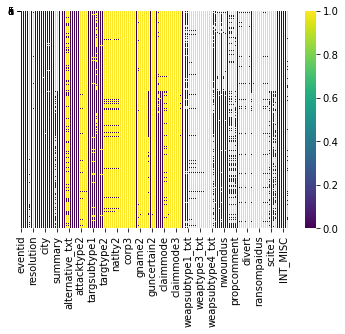

In [3]:
# CHECKING FOR MISSING(NaN) VALUES
sns.heatmap(df.isnull(), yticklabels='False', cbar='False', cmap='viridis')

In [4]:
# Changing the column names
df.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state'
                             ,'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                             'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                             'motive':'Motive','success':'Success'},inplace=True)

In [5]:
# Getting basic Insights from the data
df.describe()

,Event_ID,Year,Month,Day,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


## **Getting the all the Unique Countries and Years of the Terrorist Attacks**

In [6]:
df['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [7]:
df['Country'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

### **Finding correlation ** ###
### **Usage of numerical, not categorical data.** 

### **Shows relations between features lighter area= very good correlation**

### **One of the fastest ways to strengthen a model is to identify and reduce the features in the dataset that are highly correlated**

### **Correlation between variables means that both independent variables have a relationship with each other**

### **This Feature can further be used to avoid Multicollinearity.**

In [8]:
df.corr()

,Event_ID,Year,Month,Day,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
Event_ID,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
Year,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
Month,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
Day,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


### The values range between -1.0 and 1.0, with -1 indicating a perfect negative correlation, +1 indicating a perfect positive correlation, and 0 indicating no correlation at all.###

## **Finding the most affected regions and most affected cities by Terrorism**

In [9]:
#Region
df['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [10]:
#Cities
df['city'].value_counts()

Unknown                   9775
Baghdad                   7589
Karachi                   2652
Lima                      2359
Mosul                     2265
                          ... 
Basantatar                   1
Mughalsarai                  1
Joh I Rong  (District)       1
Rang-ay                      1
Baradero                     1
Name: city, Length: 36674, dtype: int64

## **DATA VISUALIZATION**

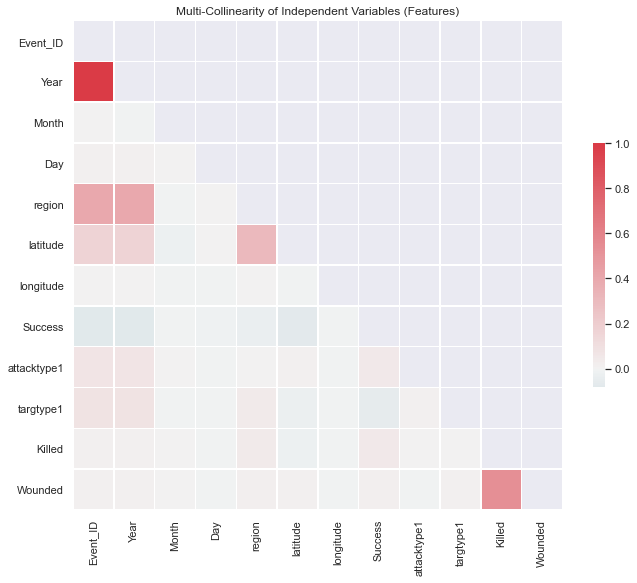

In [16]:
# Creating a correlation matrix
df = df[['Event_ID','Year','Month','Day','Country','Region','region','state','latitude','longitude','Success','AttackType','attacktype1'
               ,'Target_type','targtype1','Target','natlty1_txt','Killed','Wounded','Motive','city','Weapon_type','Group']]
sns.set(style='dark')
corr = df.corr()                          #Creating a covariance matrix
mask = np.zeros_like(corr, dtype=bool)    #Creating a mask of our covariance matrix
mask[np.triu_indices_from(mask)] = True  
# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10, as_cmap=True)    #Creating a custom diverging colormap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True,
                linewidth=.5, cbar_kws= {'shrink': .5})
ax.set_title('Multi-Collinearity of Independent Variables (Features)')
plt.savefig('multicollinearity of features')

### **As the color becomes darker in either direction (red or blue) that means that those variables are more highly correlated** 
### **and should not be paired together in the same model because multi-collinearity can affect the accuracy of the model.**

<function matplotlib.pyplot.show(close=None, block=None)>

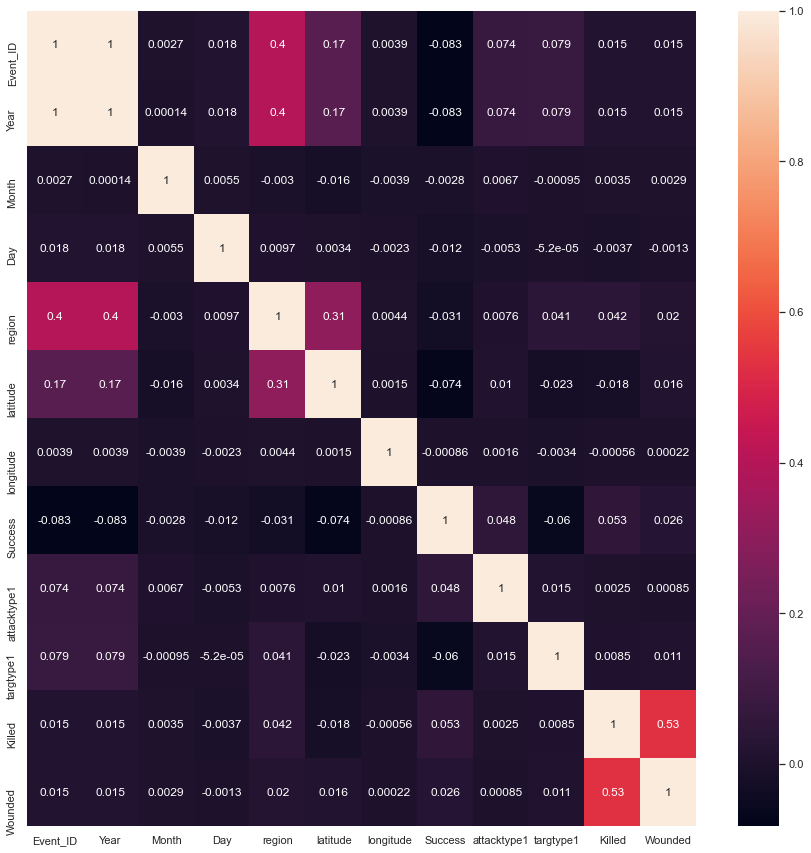

In [17]:
fig, axes = plt.subplots(1,1, figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show
# This is a graphical representation of the covariance matrix

## **Terrorist Attacks Year wise**

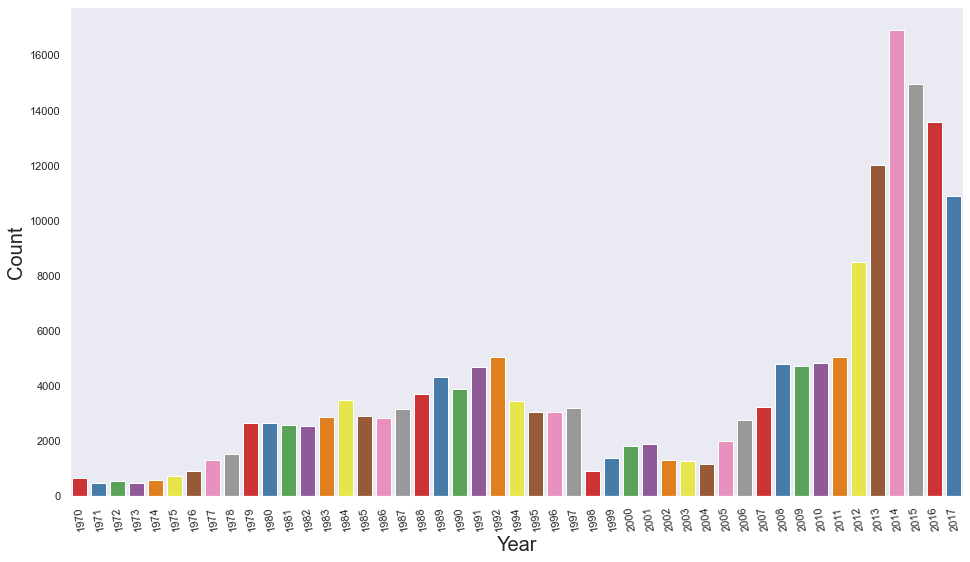

In [18]:
plt.figure(figsize=(16,9))
sns.countplot(data=df, x ='Year', palette='Set1')
plt.xticks(rotation=100)
plt.xlabel('Year', size=20)
plt.ylabel('Count', size=20)
plt.show()

### **CONCLUSION:- As we can see from the above Graph, 2014 is the year with the most amount of terrorist attacks.**

## **Terrorist Attacks Region wise**

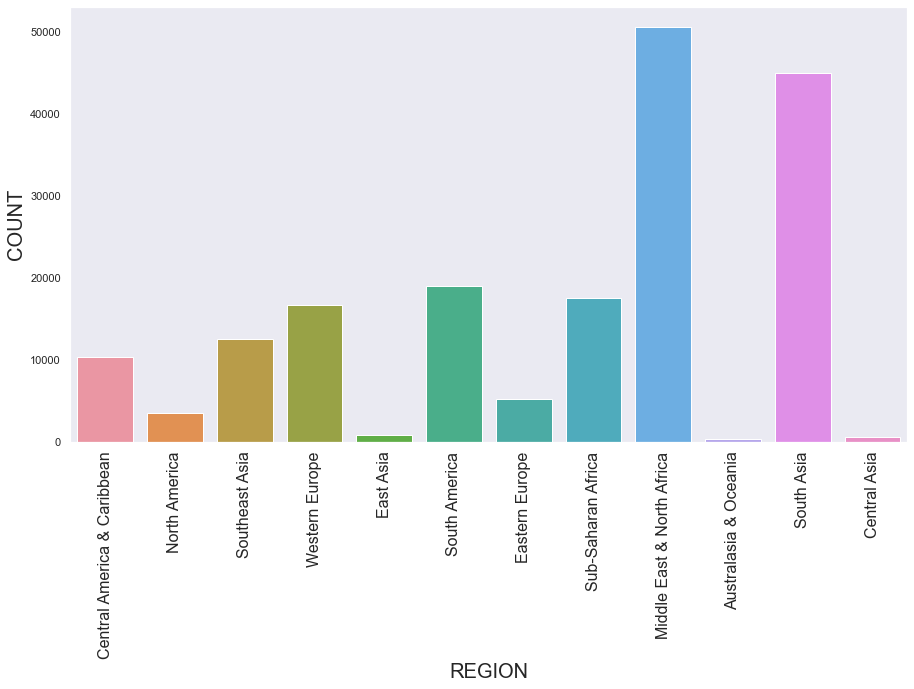

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x='Region') 
plt.xticks(size = 16,rotation=90) 
plt.xlabel("REGION",size=20) 
plt.ylabel("COUNT",size=20) 
plt.show()

### **CONCLUSION:- As we can see from the above plot, the region which is affected the most is Middle East & North Africa.**

## **Country wise Attacks**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


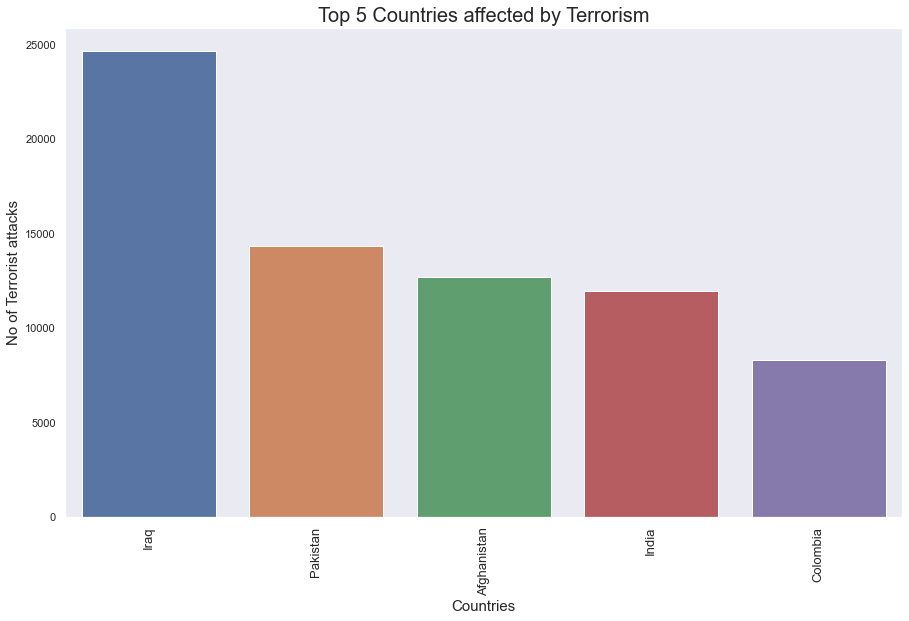

In [19]:
plt.figure(figsize=(15,9))
x = df['Country'].value_counts().index[:5]
y = df['Country'].value_counts().values[:5]
sns.barplot(x, y, palette='deep')
plt.title('Top 5 Countries affected by Terrorism', size=20)
plt.xlabel('Countries', size=15)
plt.ylabel('No of Terrorist attacks', size=15)
plt.xticks(size=13, rotation=90)
plt.show()

### **CONCLUSION:- As we can see from the above plot, the country which is affected the most by is Iraq.** 

## **City wise Attacks**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


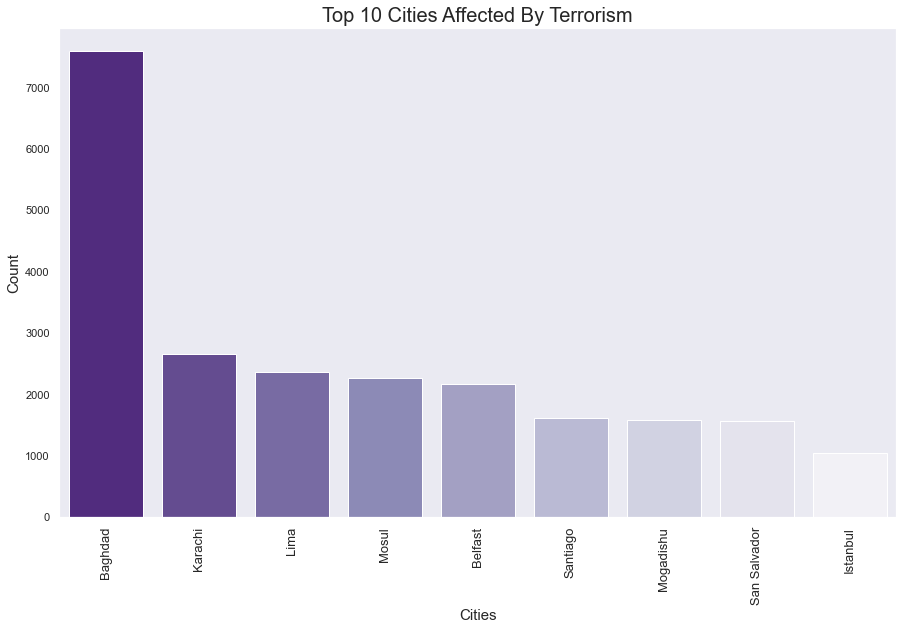

In [24]:
plt.figure(figsize=(15,9))
x =df['city'].value_counts().index[1:10]
y =df['city'].value_counts().values[1:10]
sns.barplot(x,y,palette='Purples_r')
plt.title('Top 10 Cities Affected By Terrorism',size=20)
plt.xlabel('Cities',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=13,rotation= 90)
plt.show()

### **Conclusion:- As we can see from the above graph the city affected the most is Baghdad.**

## **Types of Attacks**

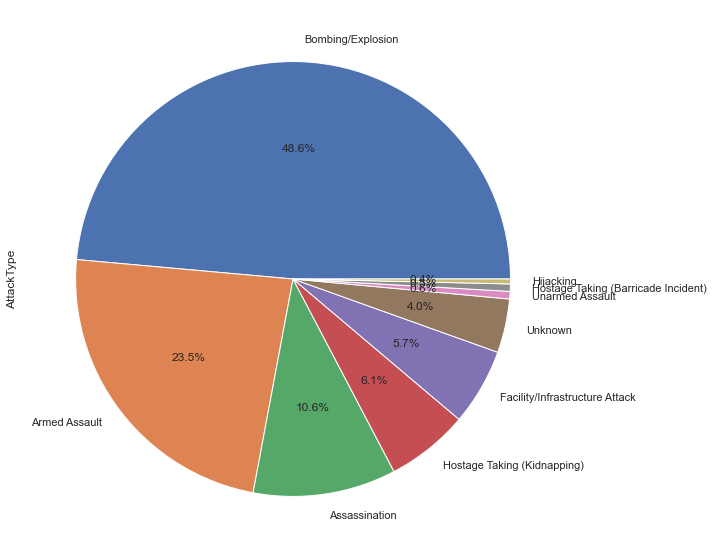

In [29]:
plt.figure(figsize=(10,10))
df['AttackType'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### **CONCLUSION:- As we can conclude from the above pie-diagram, the most used attack type is Bombing/explosion followed by Armed Assault.**

## **Terrorist Groups behind the attacks**

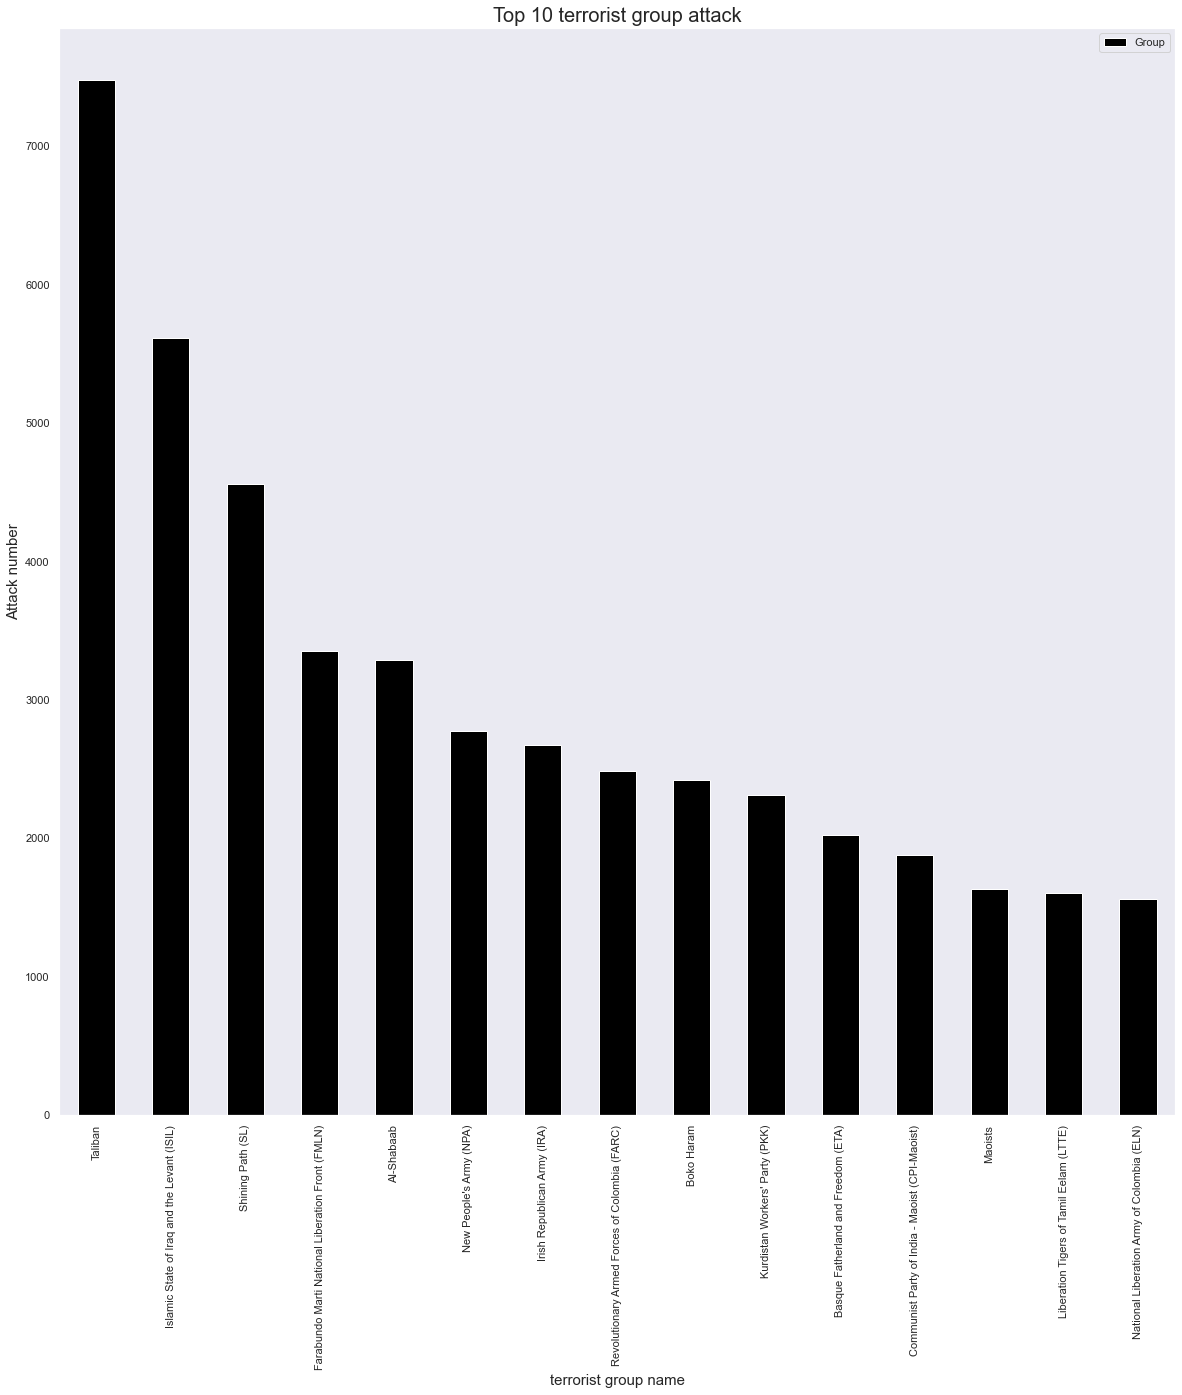

In [32]:
df['Group'].value_counts().to_frame().drop('Unknown').head(15).plot(kind='bar', color='black', figsize=(20,20))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

### **Conclusion:- Taliban has carried out maximum attacks followed by Islamic State of Iraq and the Levant(ISIL)***

## **Target Type**

In [33]:
Target = df['Target_type'].value_counts().nlargest(n=15)
Target

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Name: Target_type, dtype: int64

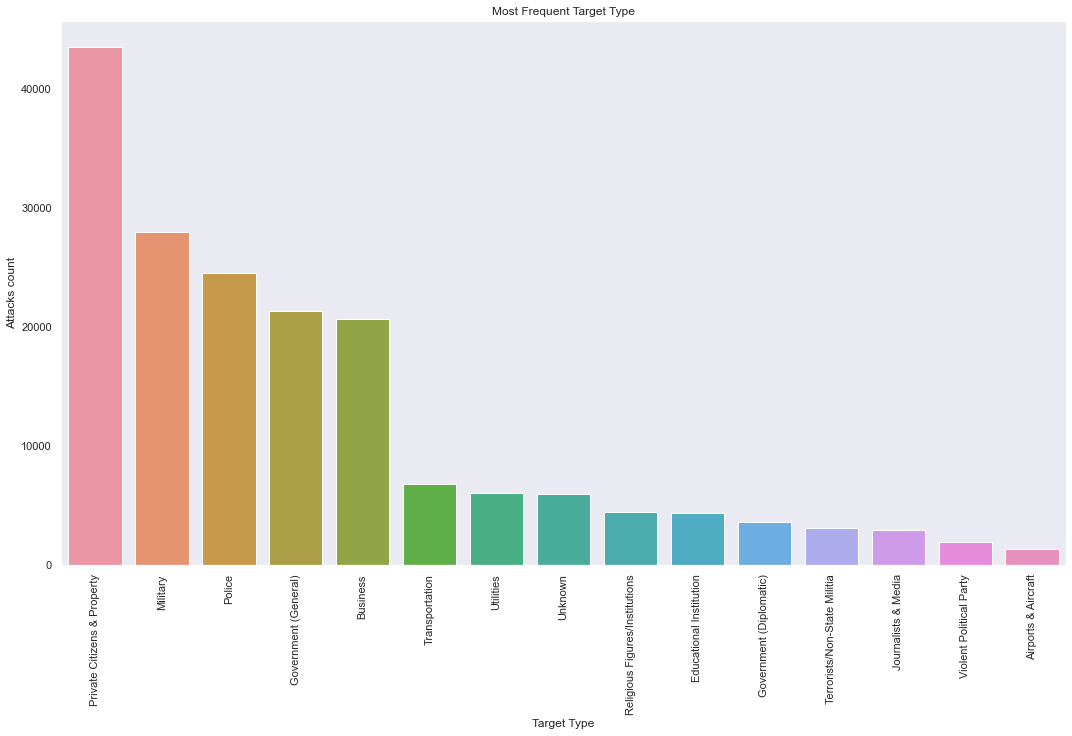

In [35]:
plt.figure(figsize= (18,10))
sns.barplot(x = Target.index , y = Target.values)
plt.title('Most Frequent Target Type')
plt.xlabel('Target Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

### ** Conclusion:- Private Citizens and property are the most common targets i.e Common people suffer the most during these terrorist attacks.**

## **FINAL CONCLUSIONS:-**

### **-  The region "Middle East & North Africa" has had the maximum terror attacks followed by South Asia.**
### **-  The country affected the most is Iraq.**
### **-  The city affected the most is Baghdad.**
### **-  The most used attack type was Bombing/Explosion.**
### **-  Taliban has carried out maximum attacks.**
### **-  Private Citizens and property are the most common targets**

# **Some Personal Thoughts on Terrorism:**

## **Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a common perception that Muslims are supporters of terrorism and they feel that terrorism is Jihad but Muslims are the people who are most damaged by such terrorist attacks. If you look at the above graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries and all of these countries follow Islam.**

# *THANK YOU*#